In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance_claims_cleaned_fixed.csv')

# Incident Characteristics Analysis

We will analyze incident Type, Incident Severity, and Collision Type to identify fraud patterns.

In [161]:
df.groupby('fraud_reported')['incident_type'].value_counts()

fraud_reported  incident_type           
No              Multi-vehicle Collision     305
                Single Vehicle Collision    286
                Vehicle Theft                86
                Parked Car                   76
Yes             Single Vehicle Collision    117
                Multi-vehicle Collision     114
                Parked Car                    8
                Vehicle Theft                 8
Name: count, dtype: int64

In [162]:
df.groupby('fraud_reported')['incident_type'].value_counts(normalize=True)

fraud_reported  incident_type           
No              Multi-vehicle Collision     0.405046
                Single Vehicle Collision    0.379814
                Vehicle Theft               0.114210
                Parked Car                  0.100930
Yes             Single Vehicle Collision    0.473684
                Multi-vehicle Collision     0.461538
                Parked Car                  0.032389
                Vehicle Theft               0.032389
Name: proportion, dtype: float64

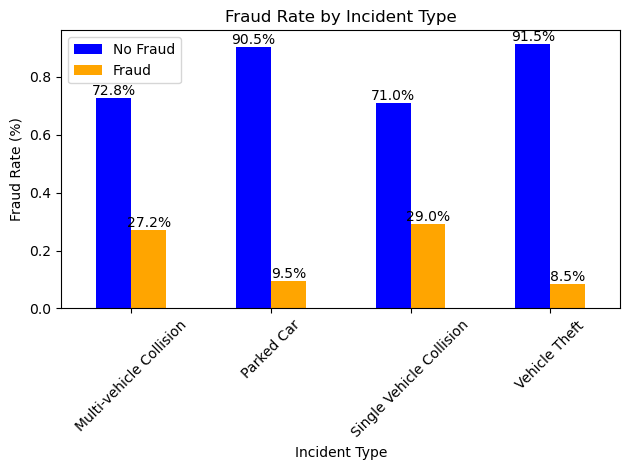

In [163]:
# Visualize fraud rates by incident type
fraud_rates = df.groupby('incident_type')['fraud_reported'].value_counts(normalize=True).unstack()
ax = fraud_rates.plot(kind='bar', stacked=False, color=['blue', 'orange'])

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = f'{height*100:.1f}%'
        ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.xlabel('Incident Type')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Incident Type')
plt.xticks(rotation=45)
plt.legend(['No Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

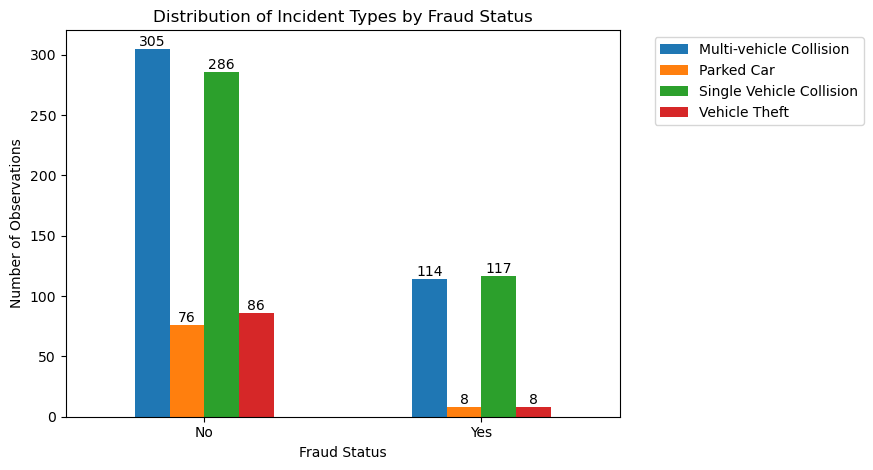

In [166]:
# Visualize incident type distribution by fraud status
ax = df.groupby('fraud_reported')['incident_type'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Status')
plt.ylabel('Number of Observations')

plt.title('Distribution of Incident Types by Fraud Status')
#plt.show()

plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Key Insights:

**High Risk:**
- Collisions (especially single vehicle) have much higher fraud rates
- Single vehicle collisions show the highest fraud probability


**Low Risk:**- Vehicle theft claims have lower fraud rates
- Parked car incidents are much less likely to be fraudulent

In [ ]:
# Now let's take a look at incident severity to see how it affects fraud reported
df.groupby('fraud_reported')['incident_severity'].value_counts(normalize=True)

fraud_reported  incident_severity
No              Minor Damage         0.419655
                Total Loss           0.324037
                Major Damage         0.144754
                Trivial Damage       0.111554
Yes             Major Damage         0.676113
                Minor Damage         0.153846
                Total Loss           0.145749
                Trivial Damage       0.024291
Name: proportion, dtype: float64

In [ ]:
counts = df.groupby('fraud_reported')['incident_severity'].value_counts()
print(counts)

fraud_reported  incident_severity
No              Minor Damage         316
                Total Loss           244
                Major Damage         109
                Trivial Damage        84
Yes             Major Damage         167
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: count, dtype: int64


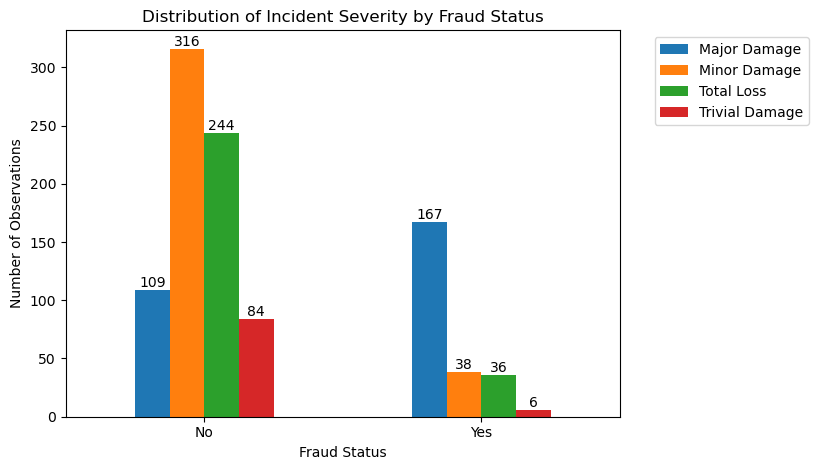

In [168]:
# Visualize incident severity distribution by fraud status
ax = df.groupby('fraud_reported')['incident_severity'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Status')
plt.ylabel('Number of Observations')

plt.title('Distribution of Incident Severity by Fraud Status')

plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Incident Severity Analysis Results

The analysis reveals that **Major Damage claims have an exceptionally high fraud rate**, making them the most critical risk factor for fraud detection.

### Key Findings:

- **Major Damage claims** show significantly higher fraud rates than other severity levels

- **Major Damage** represents the highest value claims, so focusing detection efforts here maximizes impact- The stark difference suggests potential organized fraud targeting high-value claims

In [ ]:
df.groupby('fraud_reported')['collision_type'].value_counts(normalize=True)

fraud_reported  collision_type 
No              Side Collision     0.273572
                Rear Collision     0.266932
                Front Collision    0.244356
                Unknown            0.215139
Yes             Rear Collision     0.368421
                Front Collision    0.283401
                Side Collision     0.283401
                Unknown            0.064777
Name: proportion, dtype: float64

In [ ]:
counts = df.groupby('collision_type')['fraud_reported'].value_counts()
print(counts)

collision_type   fraud_reported
Front Collision  No                184
                 Yes                70
Rear Collision   No                201
                 Yes                91
Side Collision   No                206
                 Yes                70
Unknown          No                162
                 Yes                16
Name: count, dtype: int64


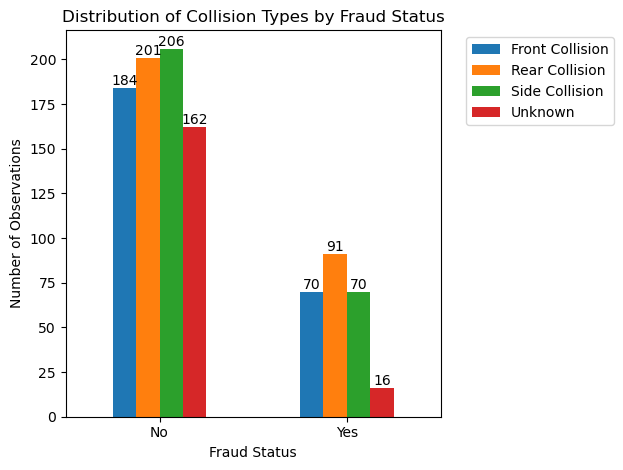

In [170]:
# Visualize collision type distribution by fraud status
ax = df.groupby('fraud_reported')['collision_type'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Status')
plt.ylabel('Number of Observations')
plt.title('Distribution of Collision Types by Fraud Status')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Collision Type Risk Assessment

**High Risk:**
- Rear collision claims should receive extra scrutiny as they're more likely to be in fraudulent cases

This pattern suggests that fraudsters may prefer rear collision scenarios, possibly because they're easier to stage or provide better opportunities for exaggerated claims.

**Low Risk:**### Analysis:

- Claims with "Unknown" collision types are much less likely to be fraudulent

- Front and side collisions show relatively balanced distributions between fraud and non-fraud cases
**Moderate Risk:**

# 🔍 Complete EDA Analysis Summary

Based on the entire incident characteristics analysis, here's the comprehensive picture:

## 📋 What Was Analyzed:
This EDA systematically examined fraud patterns across three critical dimensions:

1. **Incident Types** (collisions, theft, parked car)
2. **Incident Severity** (trivial to major damage)  
3. **Collision Types** (front, rear, side, unknown)


## 🎯 Most Critical Discovery:4. **Lower Risk:** Unknown collision types, parked car incidents

**Major Damage claims show exceptionally high fraud rates** - this represents the clearest fraud indicator in the dataset.3. **Moderate Priority:** Rear collision claims

2. **High Priority:** Single vehicle collisions

### Fraud Detection Priorities:1. **Highest Priority:** Major damage severity claims